# Covid 19 vs Sembako Price Simple Data Analysis <br>

by Andhika Rahadian

# ⚾Import Library

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

# ⚾Show Datasets Using Pandas

In [14]:
# Import file csv
df_sembako = pd.read_csv('hargasembako_cleansed.csv')
df_sembako = df_sembako.drop(df_sembako.index[[365, 366, 367]])

# Show Dataframe of Harga Sembako
df_sembako


,New ID,ID,Bulan,Tanggal,Harga Beras,Harga Daging Ayam,Harga Daging Sapi,Harga Telor Ayam,Harga Bawang merah,Harga Bawang Putih,Harga Cabai Merah,Harga Cabai Rawit,Harga Minyak Goreng,Harga Gula Pasir,Harga Rata Rata Sembako
0,1,1.0,NaN,02/11/2020,11800,34100,117850,24850,35450,27750,43700,35550,14250,14350,35965
1,2,2.0,NaN,03/11/2020,11800,34200,118150,24900,35850,27900,43850,35200,14250,14400,36050
2,3,3.0,NaN,04/11/2020,11800,34350,118300,24900,36050,27900,43750,35300,14250,14400,36100
3,4,4.0,NaN,05/11/2020,11800,34500,118250,24950,36300,27950,43600,35500,14250,14400,36150
4,5,5.0,NaN,06/11/2020,11800,34650,118250,25050,36700,28100,43350,35700,14250,14400,36225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,360,242.0,NaN,28/10/2021,11650,36100,124200,23100,29650,29500,35350,37050,17200,14050,35785
361,361,243.0,NaN,29/10/2021,11650,36050,124200,23150,29450,29450,35550,36200,17250,14050,35700
362,362,NaN,NaN,10/30/2021,11650,36040,124210,23210,29360,29480,35780,35980,17330,14080,35712
363,363,NaN,NaN,10/31/2021,11650,36040,124210,23210,29360,29480,35780,35980,17330,14080,35712


In [15]:
# Import file csv
df_covid= pd.read_csv('Covid19Indonesia_cleansed.csv')
df_covid = df_covid.drop(df_covid.index[[365, 366, 367]])

# Show Dataframe of Covid19 Indonesia (All Province)
df_covid

,Tanggal,Kasus Harian,Total kasus,Kasus aktif,% kasus aktif,Sembuh,Tingkat kesembuhan (seluruh kasus),Tingkat kesembuhan (closed cases),Meninggal Dunia,Tingkat kematian (seluruh kasus),Tingkat kematian (closed cases),Suspek aktif,Jumlah orang diperiksa,Negatif,Spesimen
0,2-Nov,2618,415402,55792,13.43%,345566,83.19%,96.09%,14044,3.38%,3.91%,"59,500",2919560,2504158,26661
1,3-Nov,2973,418375,54732,13.08%,349497,83.54%,96.11%,14146,3.38%,3.89%,"56,039",2941778,2523403,29928
2,4-Nov,3356,421731,54190,12.85%,353282,83.77%,96.12%,14259,3.38%,3.88%,"56,967",2969883,2548152,40979
3,5-Nov,4065,425796,54306,12.75%,357142,83.88%,96.14%,14348,3.37%,3.86%,"55,943",3001189,2575393,39581
4,6-Nov,3778,429574,54427,12.67%,360705,83.97%,96.15%,14442,3.36%,3.85%,"56,663",3030661,2601087,38091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,28-Oct,723,4242532,12440,0.29%,4086759,96.33%,96.61%,143333,3.38%,3.39%,NaN,30791978,26549446,259541
361,29-Oct,683,4243215,12414,0.29%,4087440,96.33%,96.61%,143361,3.38%,3.39%,NaN,30952719,26709504,244392
362,30-Oct,620,4243835,12309,0.29%,4088138,96.33%,96.61%,143388,3.38%,3.39%,NaN,31109059,26865224,239386
363,31-Oct,523,4244358,12318,0.29%,4088635,96.33%,96.61%,143405,3.38%,3.39%,NaN,31236013,26991655,202073


In [16]:
# Import file csv
df_iklim = pd.read_csv('laporan_iklim_harian_cleansed.csv')
df_iklim = df_iklim.drop(df_iklim.index[[365, 366, 367]])
# Show Dataframe of Covid19 Indonesia (All Province)
df_iklim

,Tanggal,Tavg,RH_avg,RR
0,02-11-2020,27.5,87,25.2
1,03-11-2020,27.9,86,0.0
2,04-11-2020,28.9,79,4.5
3,05-11-2020,27.4,80,1.5
4,06-11-2020,28.7,81,9.0
...,...,...,...,...
360,28-10-2021,29.7,75,1.7
361,29-10-2021,28.5,84,3.1
362,30-10-2021,28.0,84,8.4
363,31-10-2021,28.6,84,9.4


# ⚾Visualize & Analyze Data

## Time Series Data Visualization

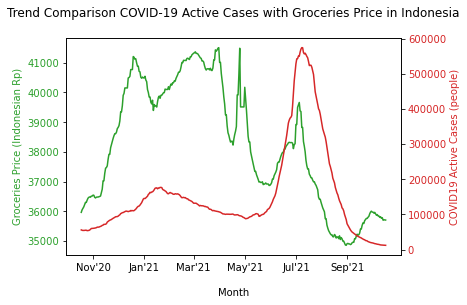

In [17]:
dfAvgSembako = df_sembako['Harga Rata Rata Sembako']
dfActiveCase = df_covid['Kasus aktif']
dfTanggal = df_sembako['New ID']
# plt.plot(dfTanggal,dfActiveCase,'r', dfAvgSembako,'b')

fig, ax1 = plt.subplots()
plt.title('Trend Comparison COVID-19 Active Cases with Groceries Price in Indonesia\n')
color = 'tab:green'
ax1.set_xlabel('\nMonth')
ax1.set_ylabel('Groceries Price (Indonesian Rp)', color=color)
ax1.plot(dfTanggal, dfAvgSembako, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('COVID19 Active Cases (people)', color=color) 
ax2.plot(dfTanggal, dfActiveCase, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# fig.tight_layout() 
# plt.xticks([15, 45, 76, 107, 135, 166, 196, 227, 257, 288, 318, 349], 
#            ['Nov\'20', 'Des\'20', 'Jan\'21', 'Feb\'21', 'Mar\'21','Apr\'21','May\'21','Jun\'21','Jul\'21', 'Aug\'21', 'Sep\'21', 'Oct\'21'])
# plt.xticks(rotation = 45)
plt.xticks([15, 76, 135, 196, 257, 318], 
           ['Nov\'20', 'Jan\'21', 'Mar\'21','May\'21','Jul\'21', 'Sep\'21'], rotation = 45)

plt.show()


## Truncate Data Sample from June-Sept 2021

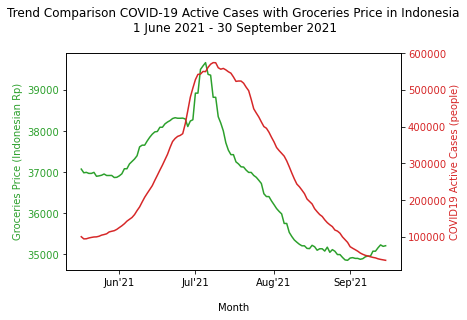

In [18]:
dfAvgSembakoJunSep21 = dfAvgSembako[212:333]
dfActiveCaseJunSep21 = dfActiveCase[212:333]
dfTanggalJunSep21 = dfTanggal[212:333]

fig, ax1 = plt.subplots()
plt.title('Trend Comparison COVID-19 Active Cases with Groceries Price in Indonesia\n 1 June 2021 - 30 September 2021\n')
color = 'tab:green'
ax1.set_xlabel('\nMonth')
ax1.set_ylabel('Groceries Price (Indonesian Rp)', color=color)
ax1.plot(dfTanggalJunSep21, dfAvgSembakoJunSep21, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() 

color = 'tab:red'
ax2.set_ylabel('COVID19 Active Cases (people)', color=color)  
ax2.plot(dfTanggalJunSep21, dfActiveCaseJunSep21, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# fig.tight_layout() 
# plt.xticks([15, 45, 76, 107, 135, 166, 196, 227, 257, 288, 318, 349], 
#            ['Nov\'20', 'Des\'20', 'Jan\'21', 'Feb\'21', 'Mar\'21','Apr\'21','May\'21','Jun\'21','Jul\'21', 'Aug\'21', 'Sep\'21', 'Oct\'21'])
# plt.xticks(rotation = 45)
plt.xticks([227, 257, 288, 318], 
           ['Jun\'21','Jul\'21','Aug\'21', 'Sep\'21'], rotation = 45)

plt.show()

## Pearson Correlation and Scatter Plot

### Truncated Data (4 Months)

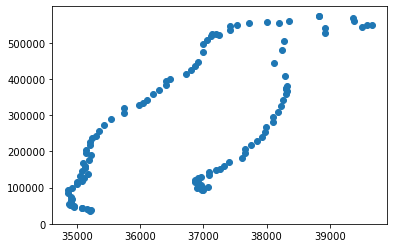

Pearsons correlation: 0.6771


In [19]:
# Menentukan korelasi antara harga rata rata sembako dengan jumlah kasus aktif di Indonesia
x = dfAvgSembakoJunSep21
y = dfActiveCaseJunSep21 
plt.scatter(x, y)
plt.yticks(np.arange(0, 600000, 100000))
plt.show()  

# Calculate Pearson's correlation
corr, _ = pearsonr(x, y)
print('Pearsons correlation: %.4f' % corr)

### Original Data (1 year)

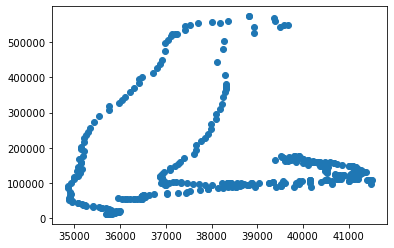

Pearsons Correlation: 0.0645


In [20]:
# Menentukan korelasi antara harga rata rata sembako dengan jumlah kasus aktif di Indonesia
x = df_sembako['Harga Rata Rata Sembako']
y = pd.to_numeric(df_covid['Kasus aktif'])
plt.scatter(x, y)
plt.yticks(np.arange(0, 600000, 100000))
plt.show()  

# calculate Pearson's correlation
corr, _ = pearsonr(x, y)
print('Pearsons Correlation: %.4f' % corr)

## Predict Using 5th Order Polynomial Regression Model

Coeeficient values:
 [-4.28125552e-24  5.18898859e-18 -1.73020229e-12 -8.12721181e-10
  6.05858440e-02  3.39730743e+04]


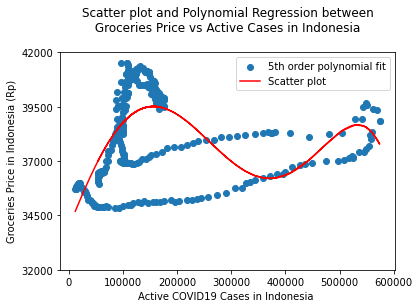

In [21]:

y = dfAvgSembako
x = dfActiveCase
p = np.polyfit(x, y, 5)  # Last argument is degree of polynomial

print("Coeeficient values:\n", p)

predict = np.poly1d(p)
plt.title ('Scatter plot and Polynomial Regression between\n Groceries Price vs Active Cases in Indonesia \n')
plt.ylabel('Groceries Price in Indonesia (Rp)')
plt.xlabel('Active COVID19 Cases in Indonesia ')

plt.scatter(x, y)
plt.plot(x, predict(x), 'r')

datax_os = np.linspace(np.min(x), np.max(x), 1024)
plt.xticks(np.arange(0, 700000, 100000))
plt.yticks(np.arange(32000, 44500, 2500))
plt.legend(['5th order polynomial fit', 'Scatter plot'])
plt.show()

### Calculate Model Loss (Mean Squared Error)

In [22]:
print("MSE value: ", mean_squared_error(y,predict(x)))

MSE value:  2511495.1835824507
